<a href="https://colab.research.google.com/github/nanabonsu92/Deep-Learning_TIES4911/blob/main/Bonsu_Afrane_Kwaku_Task_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1-2**

Find some real data set (or build your own toy dataset) with at least 30 samples to perform Linear Regression with simple Linear Regressor (using TF implementation), Scikit-learn based Linear Regressor and Keras based Linear Regressor. Show the trained model parameters (loss, accuracy, etc.) for each solution and visualize the prediction results on plot. Run predictions on several selected inputs and compare predicted values.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#load the dataset
dataframe = pd.read_csv("/content/gdrive/MyDrive/Deep Learning 2024/HousingData.csv")

In [ ]:
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
SEED_VALUE = 42

#fix seed to make training deterministic
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [ ]:
X = dataframe.iloc[:, :-1]  # All rows, all columns except the last one
y = dataframe.iloc[:, -1]   # All rows, only the last column

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the datasets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Displaying the first entry of the training set
print("\ninput_features: ", x_train.iloc[0])
print("\noutput_target: ", y_train.iloc[0])

(404, 13)
(404,)
(102, 13)
(102,)

input_features:  CRIM        15.0234
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6140
RM           5.3040
AGE         97.3000
DIS          2.1007
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B          349.4800
LSTAT       24.9100
Name: 477, dtype: float64

output_target:  12.0


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

Extracting Features from the Dataset

I will be using a single feature from the dataset, so I will staore the feature in a vew variable

In [ ]:
# Assuming 'RM' is a column name in your DataFrame
x_train_id = x_train['RM']
x_test_id = x_test['RM']

# Checking the shape of the selected feature
print(x_train_id.shape)
print(x_test_id.shape)

(404,)
(102,)


Ploting the features

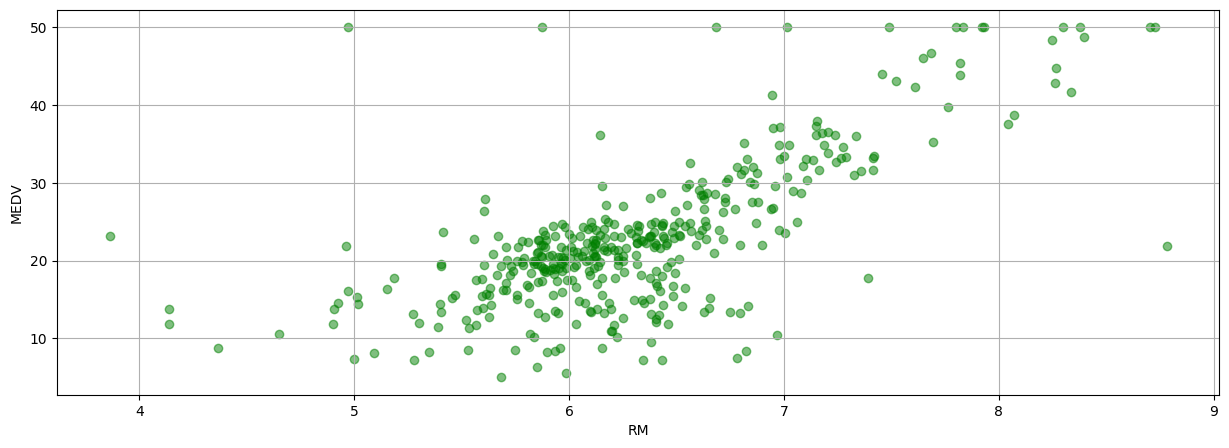

In [ ]:
plt.figure(figsize=(15, 5))

plt.xlabel('RM')
plt.ylabel('MEDV')
plt.grid("on")
plt.scatter(x_train_id[:], y_train, color='green', alpha=0.5);

Defining the Keras Model

In [ ]:
model = Sequential()

#Defining the model consisting of a single neuron.
model.add(Dense(units=1, input_shape=(1,)))

#Displaying a summary of the model architecture.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compiling the Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.005),
              loss='mse', metrics=['mae'])

Training the Model

In [ ]:
history = model.fit(x_train_id,
                    y_train,
                    batch_size=16,
                    epochs=101,
                    validation_split=0.3)

Epoch 1/101
18/18 [==============================] - 1s 9ms/step - loss: 961.2241 - mae: 29.2441 - val_loss: 880.8791 - val_mae: 28.4095
Epoch 2/101
18/18 [==============================] - 0s 3ms/step - loss: 916.8140 - mae: 28.4837 - val_loss: 842.9088 - val_mae: 27.7455
Epoch 3/101
18/18 [==============================] - 0s 3ms/step - loss: 878.6500 - mae: 27.8259 - val_loss: 806.6489 - val_mae: 27.0963
Epoch 4/101
18/18 [==============================] - 0s 3ms/step - loss: 841.7899 - mae: 27.1719 - val_loss: 771.8278 - val_mae: 26.4581
Epoch 5/101
18/18 [==============================] - 0s 3ms/step - loss: 806.2009 - mae: 26.5277 - val_loss: 737.4301 - val_mae: 25.8123
Epoch 6/101
18/18 [==============================] - 0s 2ms/step - loss: 771.3658 - mae: 25.8776 - val_loss: 704.2632 - val_mae: 25.1741
Epoch 7/101
18/18 [==============================] - 0s 3ms/step - loss: 737.5492 - mae: 25.2321 - val_loss: 672.1455 - val_mae: 24.5406
Epoch 8/101
18/18 [======================

In [ ]:
# Evaluate the model on the test data
loss, mae = model.evaluate(x_test_id, y_test, verbose=0)

# Print loss and MAE
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

Test Loss: 57.056888580322266
Test MAE: 5.347475528717041


Plotting the Training Results

In [ ]:
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


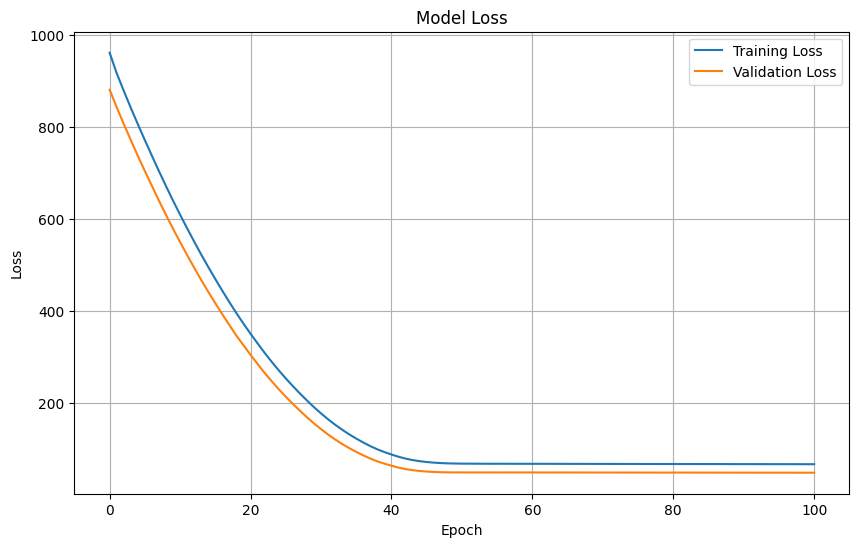

In [ ]:
plot_loss(history)

Making Predictions Using the model

In [ ]:
#Predicting the median price of a home with [3, 4, 5, 6, 7] rooms.
x = [3, 4, 5, 6, 7]
y_pred = model.predict(x)
for idx in range (len(x)):
  print("Predicted price of a home with {} rooms: ${}K".format(x[idx], int(y_pred[idx]*10)/10))

1/1 [==============================] - 0s 102ms/step
Predicted price of a home with 3 rooms: $11.8K
Predicted price of a home with 4 rooms: $15.3K
Predicted price of a home with 5 rooms: $18.7K
Predicted price of a home with 6 rooms: $22.1K
Predicted price of a home with 7 rooms: $25.5K


Ploting the Model and the data

In [ ]:
#Generating feature data that spans the range of interest for the independent variable.
x = tf.linspace(3, 9, 10)

#Use the model to predict the dependent variable.
y = model.predict(x)

1/1 [==============================] - 0s 48ms/step


In [ ]:
def plot_data(x_data, y_data, x, y, title=None):

  plt.figure(figsize=(10, 6))
  plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
  plt.plot(x, y, color='k', label='Model Predictions')
  plt.xlabel('RM')
  plt.ylabel('MEDV [$K]')
  plt.title(title)
  plt.grid(True)
  plt.legend()

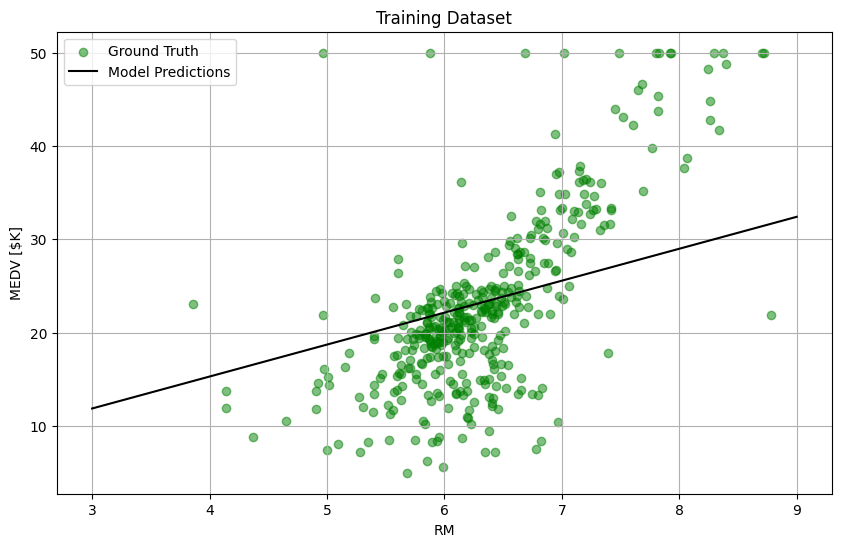

In [ ]:
plot_data(x_train_id, y_train, x, y, title='Training Dataset')

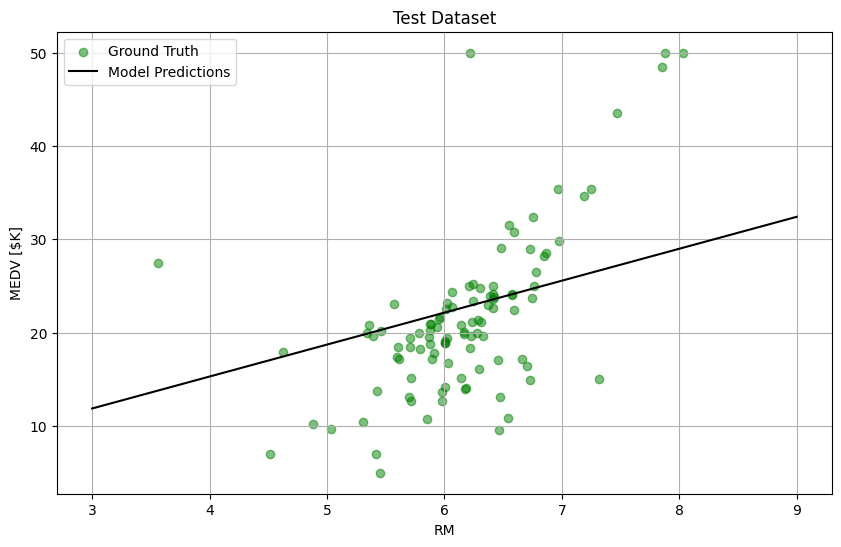

In [ ]:
plot_data(x_test_id, y_test, x, y, title='Test Dataset')

Scikit-Learn Linear regression

In [ ]:
# Reshaping the data to 2D arrays for Scikit-learn
x_train_id_sk = x_train['RM'].values.reshape(-1, 1)
x_test_id_sk = x_test['RM'].values.reshape(-1, 1)

Defining the Scikit-Learn Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression Model
sk_model = LinearRegression()

In [ ]:
# Training the model
sk_model.fit(x_train_id_sk, y_train)

LinearRegression()

In [ ]:
# Predicting with the model
y_pred_train_sk = sk_model.predict(x_train_id_sk)
y_pred_test_sk = sk_model.predict(x_test_id_sk)

In [ ]:
# Predicting the median price of a home with [3, 4, 5, 6, 7] rooms.
x_sk = np.array([3, 4, 5, 6, 7]).reshape(-1, 1)  # Reshaping to a 2D array
y_pred_sk = sk_model.predict(x_sk)

for idx in range(len(x_sk)):
    print(f"Predicted price of a home with {x_sk[idx][0]} rooms: ${y_pred_sk[idx]*1000:,.2f}")

Predicted price of a home with 3 rooms: $-8,201.41
Predicted price of a home with 4 rooms: $1,146.89
Predicted price of a home with 5 rooms: $10,495.19
Predicted price of a home with 6 rooms: $19,843.49
Predicted price of a home with 7 rooms: $29,191.79


In [ ]:
# Mean Squared Error (MSE) for training and test sets
mse_train = mean_squared_error(y_train, y_pred_train_sk)
mse_test = mean_squared_error(y_test, y_pred_test_sk)

In [ ]:
# Printing the MSE values
print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")

Training MSE: 42.99661556265404
Test MSE: 46.144775347317264


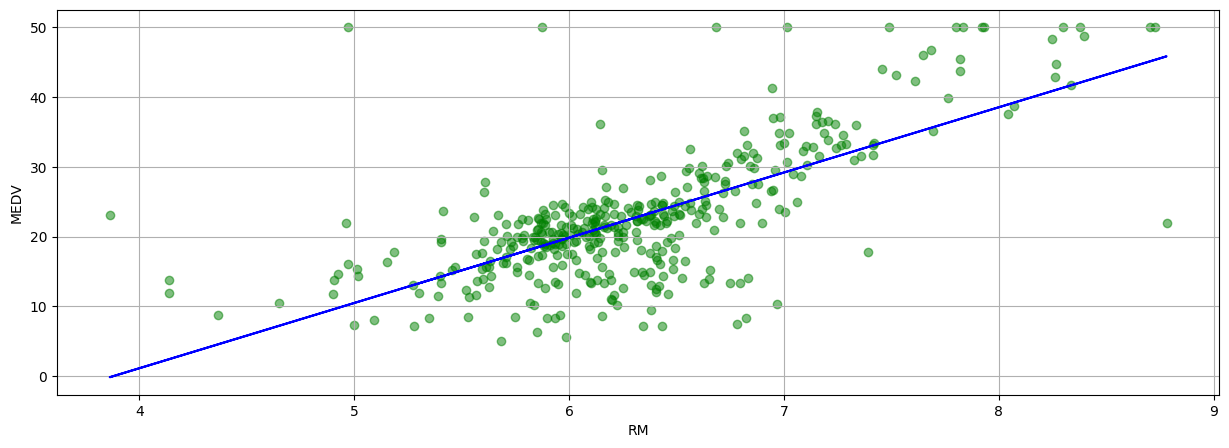

In [ ]:
# Plotting the regression line
plt.figure(figsize=(15, 5))
plt.scatter(x_train_id_sk, y_train, color='green', alpha=0.5)
plt.plot(x_train_id_sk, y_pred_train_sk, color='blue')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.grid(True)
plt.show()

In [ ]:
# Evaluating the model
train_score = sk_model.score(x_train_id_sk, y_train)
test_score = sk_model.score(x_test_id_sk, y_test)
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.5050658352776293
Test Score: 0.3707569232254778


TesorFlow Simple Linear Regression Model

In [ ]:
# Selecting a single feature 'RM'
x_train_id_tf = x_train['RM'].values.reshape(-1, 1)
x_test_id_tf = x_test['RM'].values.reshape(-1, 1)

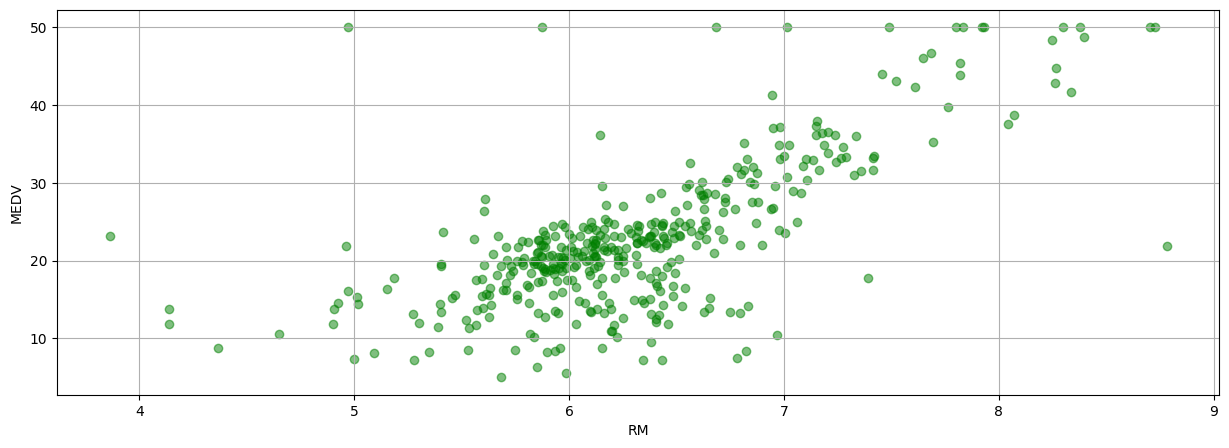

In [ ]:
# Plotting the data
plt.figure(figsize=(15, 5))
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.grid(True)
plt.scatter(x_train_id_tf, y_train, color='green', alpha=0.5)
plt.show()

In [ ]:
# TensorFlow linear regression model
class LinearModel:
    def __init__(self):
        # Initialize the weights and bias
        self.W = tf.Variable(tf.random.normal([1, 1]), name='weight')
        self.b = tf.Variable(tf.random.normal([1]), name='bias')

    def __call__(self, x):
        return tf.matmul(x, self.W) + self.b

In [ ]:
# Loss function
def loss(y_true_tf, y_pred_tf):
    return tf.reduce_mean(tf.square(y_true_tf - y_pred_tf))

In [ ]:
# Optimization
optimizer = tf.optimizers.SGD(learning_rate=0.005)

In [ ]:
# Training function
def train(model, x, y):
    with tf.GradientTape() as tape:
        y_pred = model_tf(x)
        loss_value = loss(y, y_pred)
    gradients = tape.gradient(loss_value, [model.W, model.b])
    optimizer.apply_gradients(zip(gradients, [model.W, model.b]))
    return loss_value

In [ ]:
# Convert data to TensorFlow tensors
x_train_tf = tf.convert_to_tensor(x_train_id_tf, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train.values.reshape(-1, 1), dtype=tf.float32)

In [ ]:
# Model training
model_tf = LinearModel()
epochs = 101
for epoch in range(epochs):
    loss_value = train(model_tf, x_train_tf, y_train_tf)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss: {loss_value.numpy()}")

Epoch 0: Loss: 510.0302429199219
Epoch 10: Loss: 59.83609390258789
Epoch 20: Loss: 59.78496170043945
Epoch 30: Loss: 59.74427032470703
Epoch 40: Loss: 59.70368194580078
Epoch 50: Loss: 59.66318893432617
Epoch 60: Loss: 59.62278747558594
Epoch 70: Loss: 59.582489013671875
Epoch 80: Loss: 59.54228210449219
Epoch 90: Loss: 59.5021858215332
Epoch 100: Loss: 59.4621696472168


In [ ]:
# Predictions
y_pred_train_tf = model_tf(x_train_tf)

In [ ]:
# Predicting the median price of a home with [3, 4, 5, 6, 7] rooms.
x_tf = np.array([3, 4, 5, 6, 7], dtype=np.float32).reshape(-1, 1)  # Reshaping to a 2D array and ensuring float32 type

# Using the model directly for prediction
y_pred_tf = model_tf(x_tf).numpy().flatten()  # .numpy() to convert to numpy array, .flatten() to convert to 1D array

for idx in range(len(x_tf)):
    print(f"Predicted price of a home with {x_tf[idx][0]} rooms: ${y_pred_tf[idx]*1000:,.2f}")

Predicted price of a home with 3.0 rooms: $11,114.13
Predicted price of a home with 4.0 rooms: $14,770.45
Predicted price of a home with 5.0 rooms: $18,426.76
Predicted price of a home with 6.0 rooms: $22,083.08
Predicted price of a home with 7.0 rooms: $25,739.40


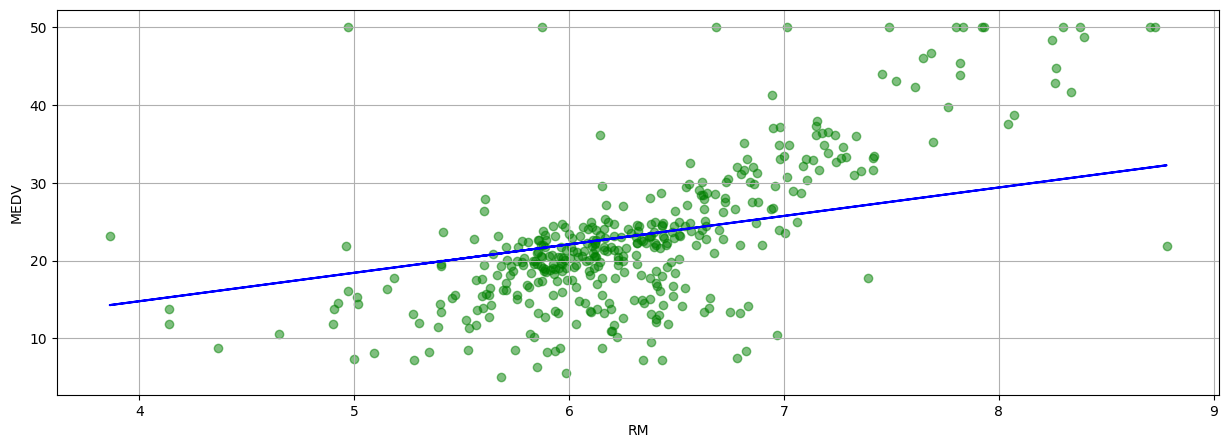

In [ ]:
# Plotting the regression line
plt.figure(figsize=(15, 5))
plt.scatter(x_train_id_tf, y_train, color='green', alpha=0.5)
plt.plot(x_train_id_tf, y_pred_train_tf, color='blue')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.grid(True)
plt.show()